<a href="https://colab.research.google.com/github/EthanDuog/Indeed-Job-Scrapping/blob/main/Indeed_Job_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Created: 29/01/2023 by: Ethan Duong*

# **Indeed Job Web Scrapping**
Using python to scrap developer job on Indeed and turn them into csv file. 

Using Python allow us to automate many of our tasks so we can save time and effort for other important things. This code will generate a web scrapper that allows user scrap indeed website and retrieve desired data from the web in csv format. This would help job seekers to gather abd filter a large number of current jobs without putting too much effort.  

**Let's start build out job scrapper !!!**

For this web scrapper, we will need to user install and import these libraries below:

In [ ]:
! pip install requests

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

Next, we will input:


*   Headers: This page shows you what your web browser is sending in the "User-Agent" header for your HTTP requests. You can go too google and type 'my user agent' to find this information. 
*   Current link: This is the link of indeed website, where you already input the criteria such as 'data analyst', location, and salary (depend on your job criteria.



In [4]:
HEADERS = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
current_url = 'https://ca.indeed.com/jobs?q=developer+intern&l=Toronto%2C+ON&rbl=Toronto%2C+ON&jlid=aaab304de0fc22ae&start=0&pp=gQAtAAABhdBBBPsAAAAB9qv3FwAVAQEJBxcim3ux9UpVWCNKn47okCiFAAA&vjk=952f5957f32d9ca3'


For this web scrapper, we will create 2 functions:


*   Extract: This function will request and extract the content from web base on our header and current URL 
*   Transform: This function will allow us to extract the exact information we need and tranform them into a list (we will tranform to csv later)



In [10]:
def extract(page):
  r = requests.get(current_url, HEADERS) #request the web content base on url and headers
  soup = BeautifulSoup(r.content, 'html.parser') # using soup to render the content to html.parser 
  return soup

""


Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.
More about it: [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/)

In [13]:
def transform(soup):
  # first we will need to find all the div that contains all of the jobs in 1 page (you can use inspect to have a better to navigate the class value) 
  divs = soup.find_all('div', class_='job_seen_beacon')

  #loop through each job:
  for job in divs:
    # get the title
    title = job.find('a',class_='jobTitle')
    
    # get the company name 
    company = job.find('span',class_='company').text.strip()

    # using try and except to get the salary because not all job postings contain salary
    try:
      salary = job.find('span', class_='salaryText').text.strip()
    except:
      salary=''

    # get the job summary 
    summary = job.find('div', {'class': 'summary'}).text.strip().replace()

    #create a dictionary to reatain all the information above
    job  = {
        'title': title,
        'company': company,
        'salary': salary, 
        'summary': summary
    }

    # append into joblist, we will have a list of job, and each job is a dictionary with the combination of titile, company, salary, and job summary.
    joblist.append(job)
  return  

Learn more about [Soup find all](https://www.geeksforgeeks.org/python-beautifulsoup-find-all-class/)


In [ ]:
joblist = []

We will create a for loop to loop through all the page of our result and activate the funtion though some simple lines:

In [ ]:
for i in range(0,100,10): 
  c = extract(0)
  transform(c)

These lines of code will generate the result as below:
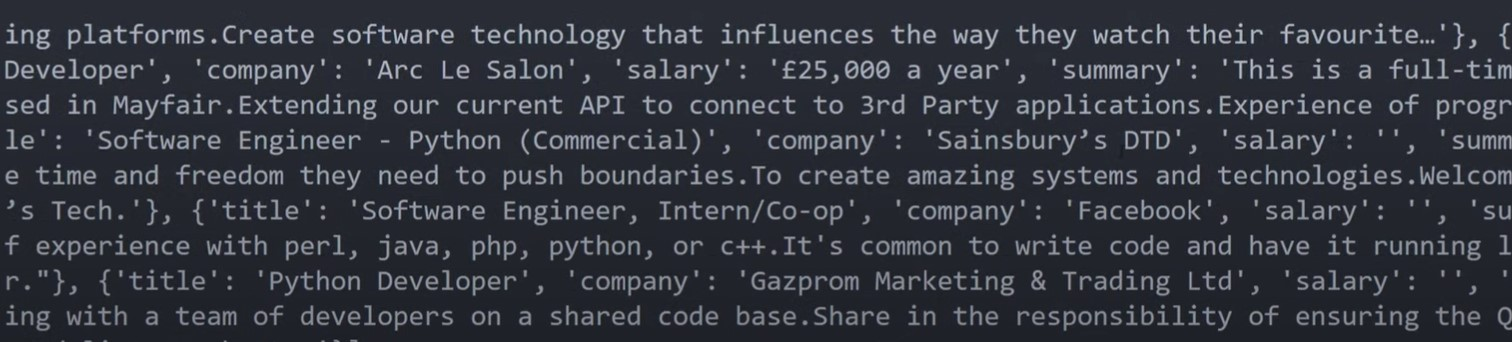

With these two line, you can easily turn the output into csv file 

In [ ]:
df = pd.DataFrame(joblist)
df.to_csv('jobs.csv')

At the end, we have succesfully created an indeed web scapper and turn them into csv file:
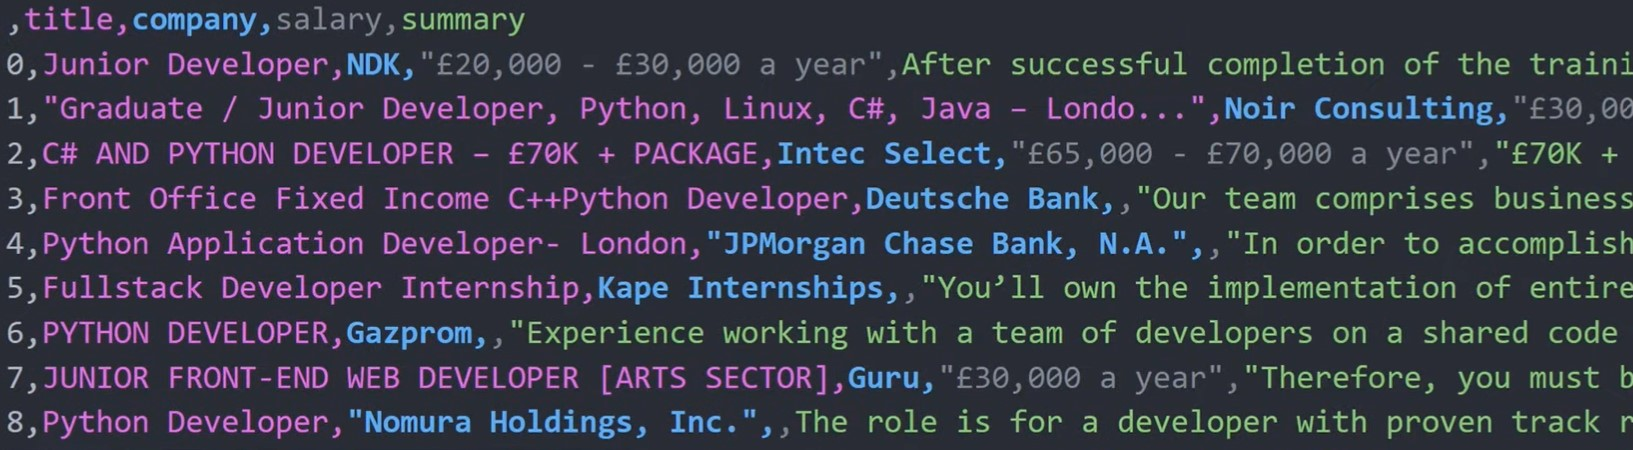